In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np

# import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import machine learning libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 # import machine learning algorithmn and metric
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, classification_report, roc_curve, recall_score
from sklearn.preprocessing import minmax_scale
from sklearn.naive_bayes import GaussianNB

In [5]:
do = pd.read_csv(r"C:\Users\yakubu Naomi\OneDrive\Documents\car_evaluation.csv")
do.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
do.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [7]:
# rename the columns
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
do.columns = columns

In [8]:
do

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [9]:
do.duplicated().sum()

0

In [10]:
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
do["doors"].value_counts()

doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

In [12]:
do["doors"] = do["doors"].replace("5more", 5).astype("int")
 

In [13]:
do["persons"].value_counts()

persons
4       576
more    576
2       575
Name: count, dtype: int64

In [14]:
do["persons"] = do["persons"].replace("more", 5).astype("int")


In [15]:
do["persons"].value_counts()

persons
4    576
5    576
2    575
Name: count, dtype: int64

In [16]:
do["doors"].value_counts()

doors
3    432
4    432
5    432
2    431
Name: count, dtype: int64

In [17]:
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int32 
 3   persons   1727 non-null   int32 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int32(2), object(5)
memory usage: 81.1+ KB


In [18]:
# splitting into X and Y 
X = do.drop(columns = ["class"])
y = do["class"]

### Label encoding

In [19]:
for data in X.columns.to_list():
    if X[data].dtype == "object":
       X[data] = LabelEncoder().fit_transform(X[data])

In [20]:
# train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [21]:
 # Random forest
rf_model = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [22]:
# prediction
y_pred = rf_model.predict(X_test)

In [23]:
y_pred[0:5]

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc'], dtype=object)

In [24]:
y_test[0:5]

599     unacc
932     unacc
628     unacc
1497      acc
1262    unacc
Name: class, dtype: object

In [25]:
# evaluate the model
rf_accuracy = print(round(accuracy_score(y_test, y_pred) * 100, 2))
rf_accuracy

96.82


In [26]:
# Using label encoder to fit transform the y_train and transform the y_test
le = LabelEncoder()
y_train_econder = le.fit_transform(y_train)
y_test_enconder = le.transform(y_test)

In [27]:
# Xgboost Classifier
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train_econder)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
# prediction
y_pred = xgboost_model.predict(X_test)

In [52]:
# evaluate the model
xgb_accuracy = print(round(accuracy_score(y_test_enconder, y_pred) * 100, 2))
xgb_accuracy

98.55


In [30]:
model = {"Random Forest":96.24, "Xgb_Boost":98.55}
model_df = pd.DataFrame({"Model": model.keys(), "Scores": model.values()})
model_df

,Model,Scores
0,Random Forest,96.24
1,Xgb_Boost,98.55


In [33]:
#3 LR model
Lm = LogisticRegression()
Lm.fit(X_train, y_train)

LogisticRegression()

## prediction

In [34]:
 y_pred

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 3, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 1, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 3, 0, 0, 2, 3, 0, 2, 3, 2, 0, 0,
       3, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 3, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0,
       2, 1, 3, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0,

In [35]:
y_pred = Lm.predict(X_test)

In [55]:
np.array(y_test [0:5])

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc'], dtype=object)

In [37]:
print(f'accuracy score for Logistic Regression model: {round ( accuracy_score(y_test, y_pred), 2)}%')

accuracy score for Logistic Regression model: 0.68%


In [38]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

GaussianNB()

In [39]:
y_test[0:5]

599     unacc
932     unacc
628     unacc
1497      acc
1262    unacc
Name: class, dtype: object

In [40]:
y_pred[0:5]

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [47]:
print(f'accuracy score for GaussianNB model: {round ( accuracy_score(y_test, y_pred), 2)}%')

accuracy score for GaussianNB model: 0.69%


In [42]:
## NB model
y_pred = nb_model.predict(X_test)

In [43]:
# import knnclassifier model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [44]:
K_neighbor = KNeighborsClassifier(n_neighbors=5)

K_neighbor.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
print(round  (accuracy_score(y_test, y_pred) * 100, 2))

69.08


In [56]:
model = {"Random Forest":0.96, "Xgb_Boost":0.98, "Logistic":0.68, "GaussianNB":0.69, "K_neighbor":0.69}
model_df = pd.DataFrame({"Model": model.keys(), "Scores": model.values()})
model_df

,Model,Scores
0,Random Forest,0.96
1,Xgb_Boost,0.98
2,Logistic,0.68
3,GaussianNB,0.69
4,K_neighbor,0.69


C:\Users\yakubu Naomi\AppData\Local\Temp\ipykernel_11052\906193286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= model_df["Model"], y= model_df["Scores"],  palette="viridis", width=0.5)


<Axes: xlabel='Model', ylabel='Scores'>

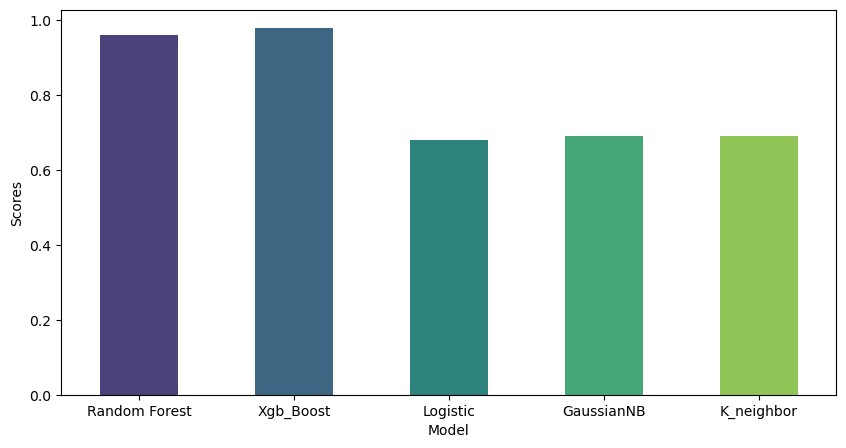

In [57]:
# Visualize the model performance
plt.figure(figsize= (10,5))
sns.barplot(x= model_df["Model"], y= model_df["Scores"],  palette="viridis", width=0.5)